In [1]:
import pandas as pd
import glob

# Load all CSV files from the directory
path = "/media/db/76C020A1C0206997/j/downloads/new/JRPdata/globalmodeldata/eps-tcgen/2024100512/csv"
csv_files = glob.glob(path + "/*.csv")

# Load CSVs into a single DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files])

# Filter out rows where 'Valid' is False
df_valid = df[df['Valid'] == True]


In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_storms(data, members_to_plot=None):
    # Set up the map with Plate Carree projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 7))

    # Add coastlines and land features
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='black')

    # Get unique members and map to colors
    unique_members = sorted(data['Model_ATCF_Name'].unique())
    if members_to_plot:
        unique_members = [m for m in unique_members if m in members_to_plot]
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_members)))
    member_colors = dict(zip(unique_members, colors))

    # Plot the data points for each member
    for member in unique_members:
        member_data = data[data['Model_ATCF_Name'] == member]
        ax.scatter(member_data['Lon'], member_data['Lat'], color=member_colors[member],
                   label=member, transform=ccrs.PlateCarree(), s=50, edgecolor='black')

    # Add a legend
    if members_to_plot is None or len(members_to_plot) > 10:
        ncol=2
    else:
        ncol=1
    ax.legend(title='Members', loc='center left', bbox_to_anchor=(1, 0.5), ncol=ncol)

    ax.set_title('EPS 2024-10-05 12Z\nGenesis Tracker', fontsize=16, pad=20)

    # Set ticks every 5 degrees
    ax.set_xticks(np.arange(-180, 180 + 1, 5), crs=ccrs.PlateCarree())  # Longitude ticks
    ax.set_yticks(np.arange(-90, 90 + 1, 5), crs=ccrs.PlateCarree())    # Latitude ticks

    # Label the ticks on the bottom and left sides
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Add gridlines for better visualization
    ax.grid(True, which='both', linestyle='--', color='gray')
    
        
    # Set extent to the Gulf of Mexico
    ax.set_extent([-100, -80, 15, 30], crs=ccrs.PlateCarree())

    # Show plot
    plt.show()


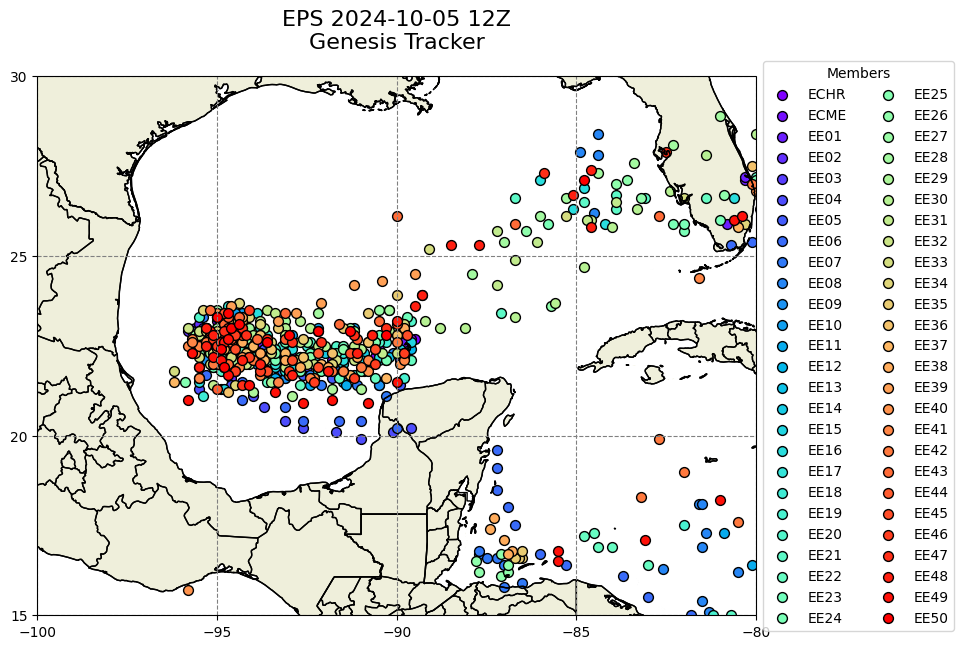

In [31]:
# Call the function to plot
plot_storms(df_valid)

In [18]:
# Plot each member separately

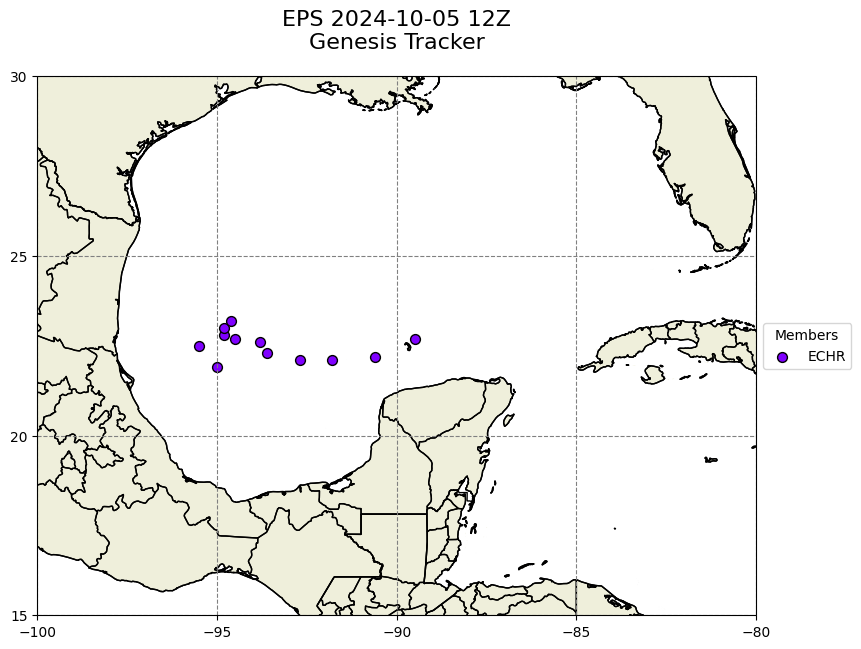

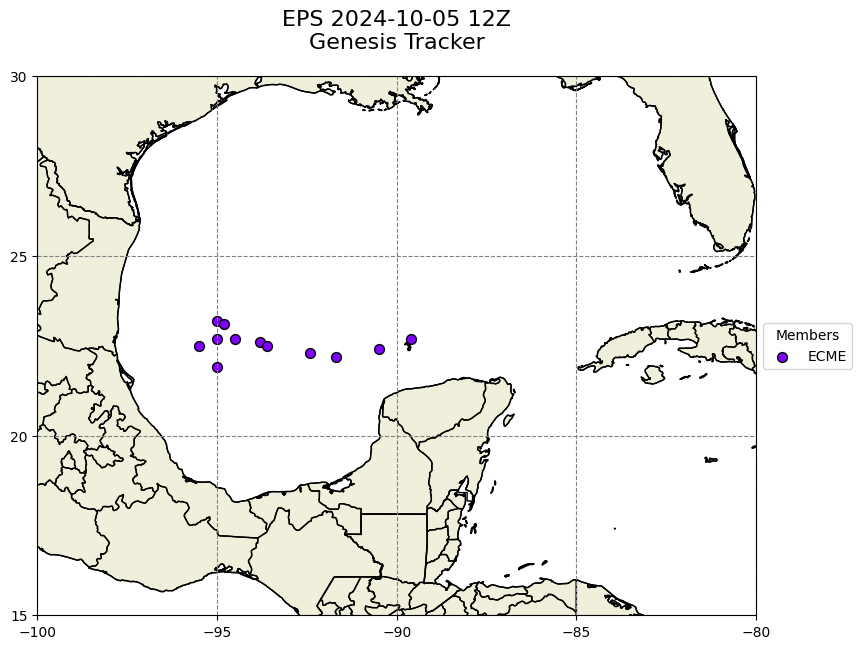

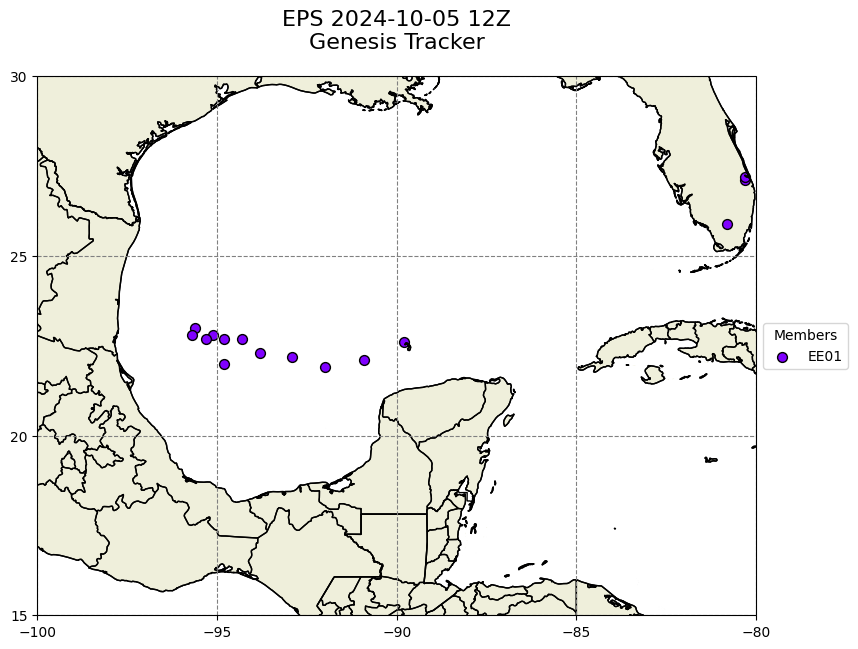

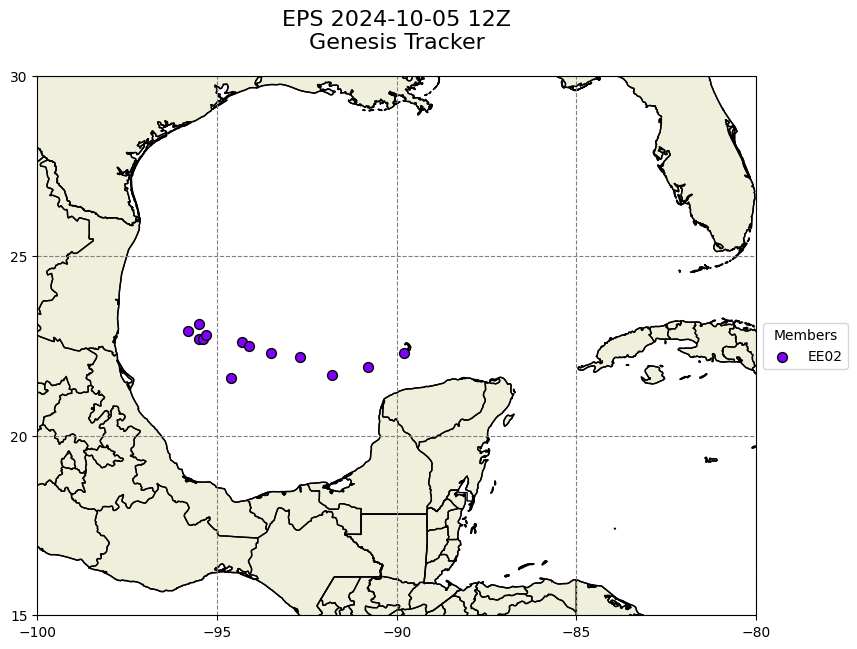

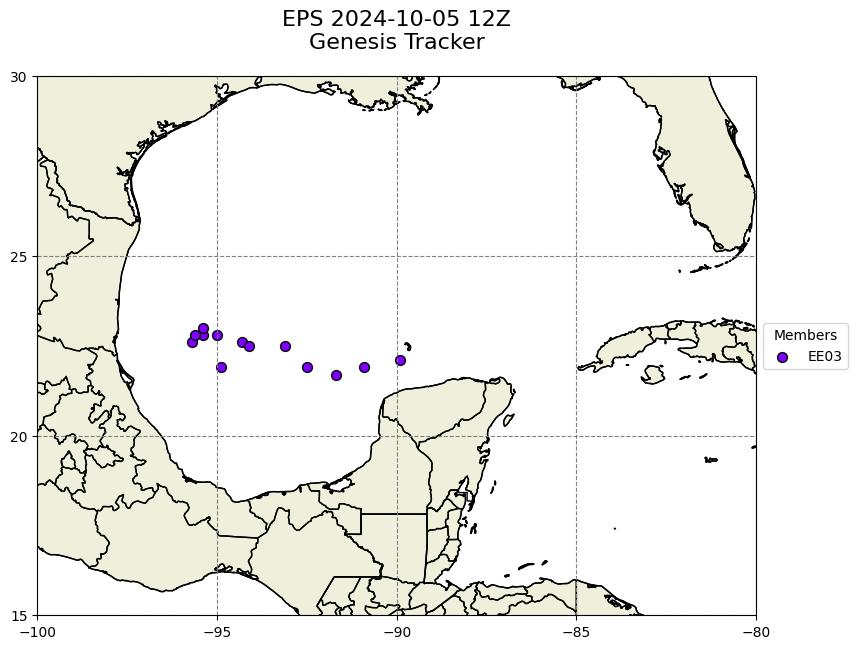

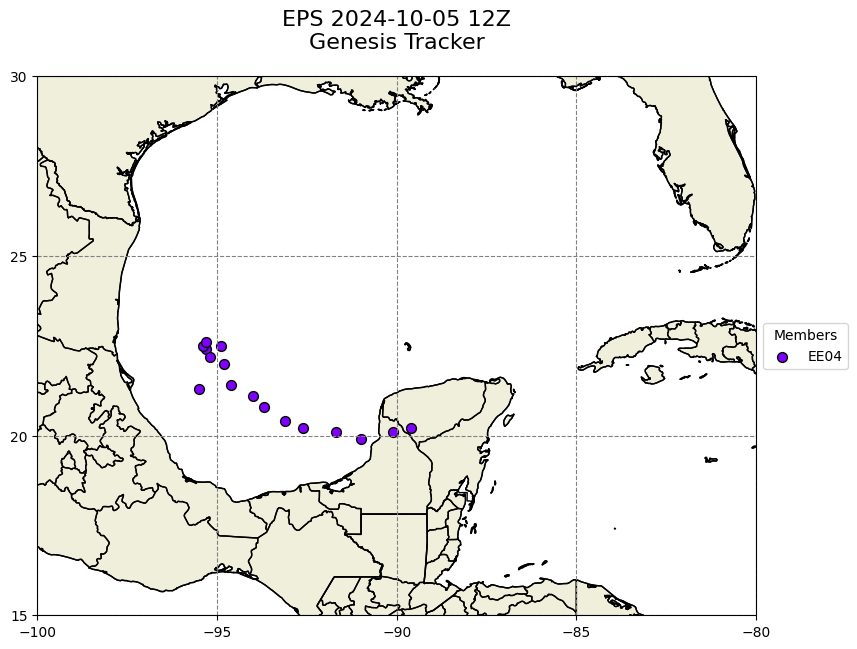

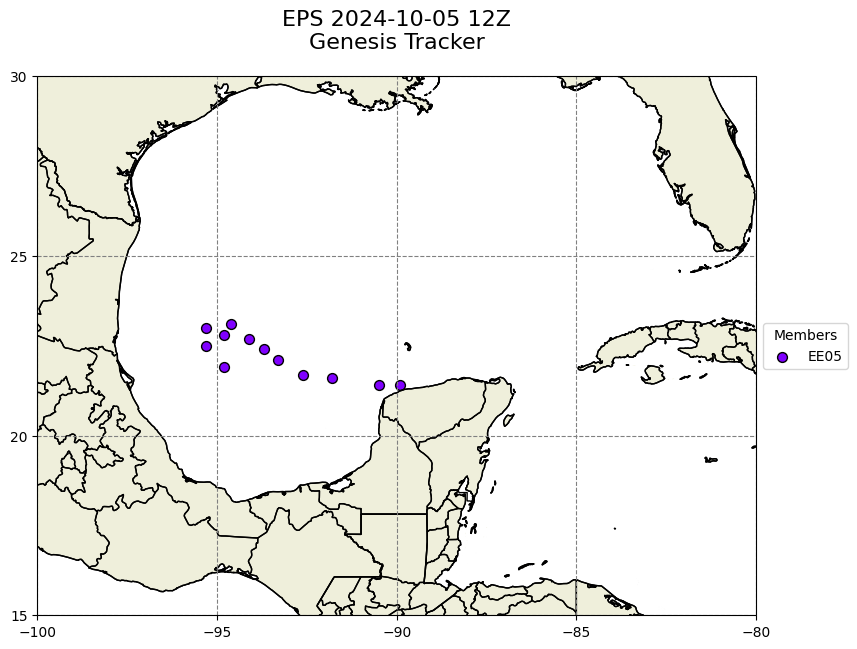

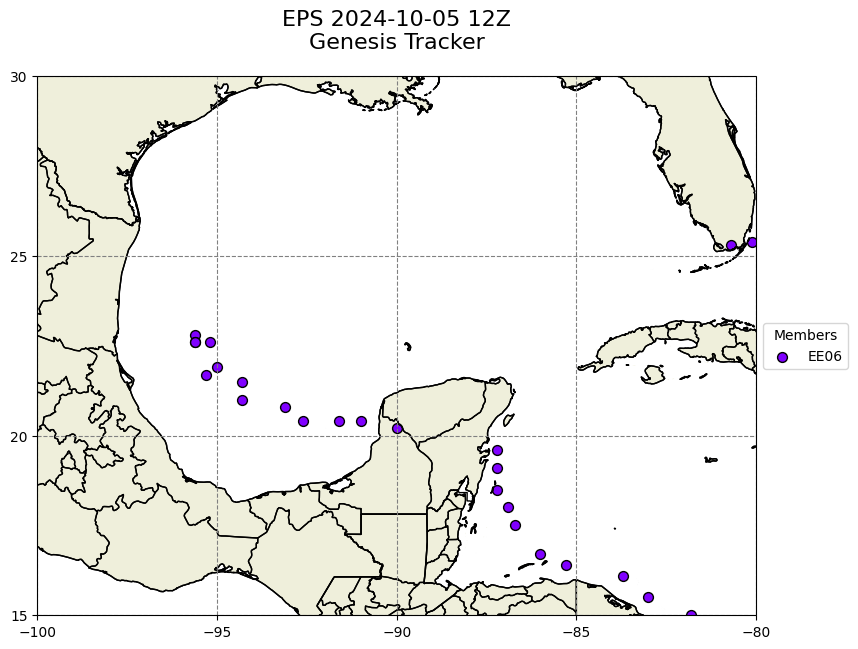

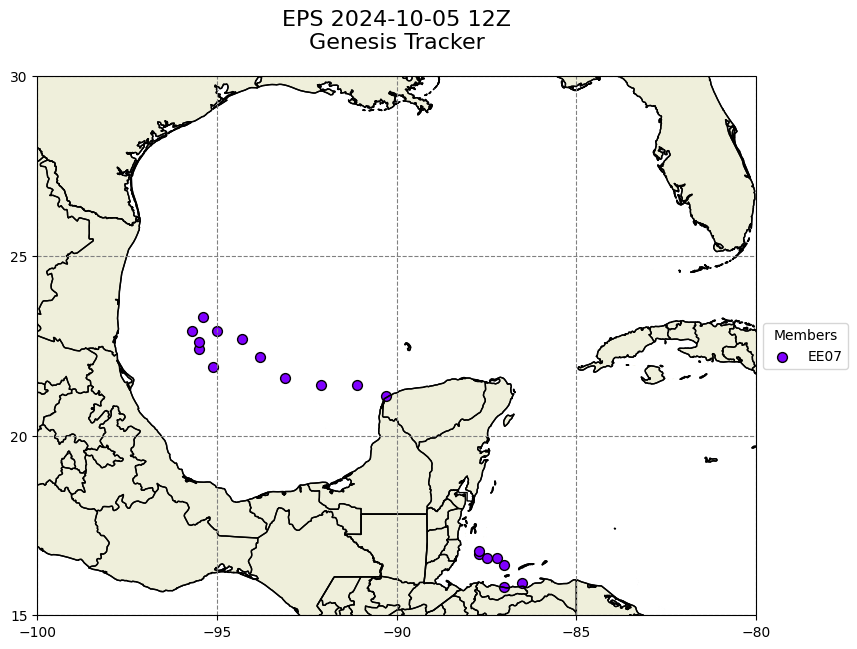

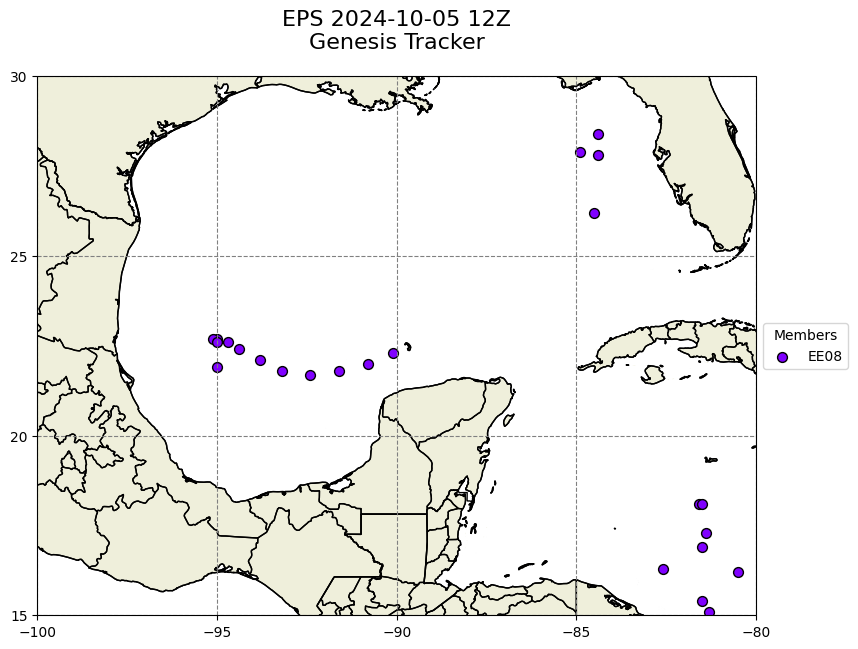

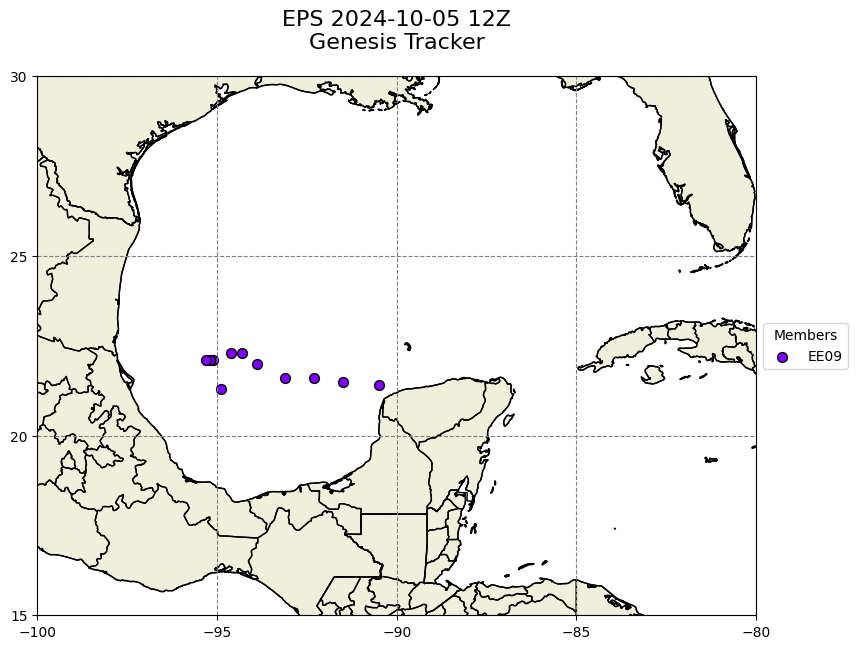

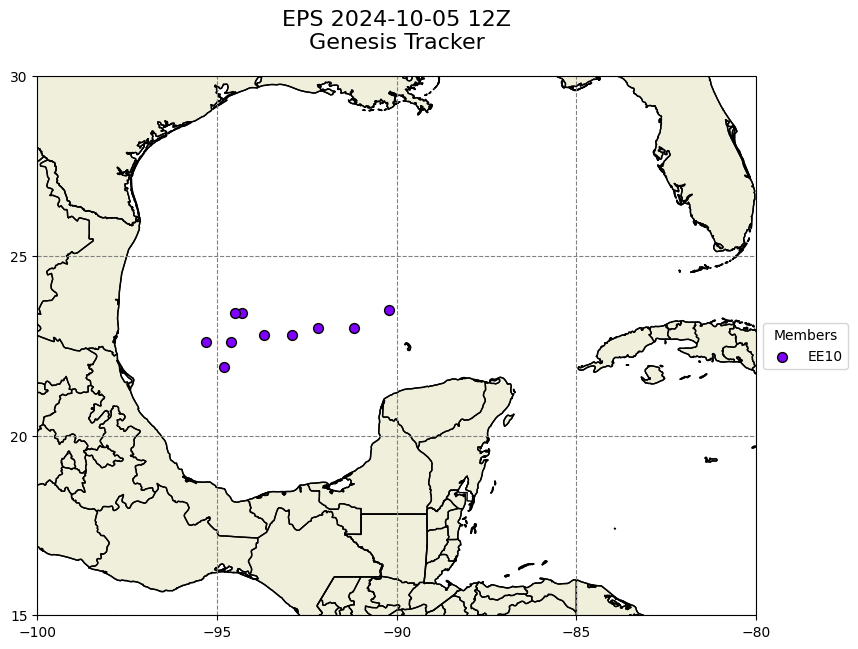

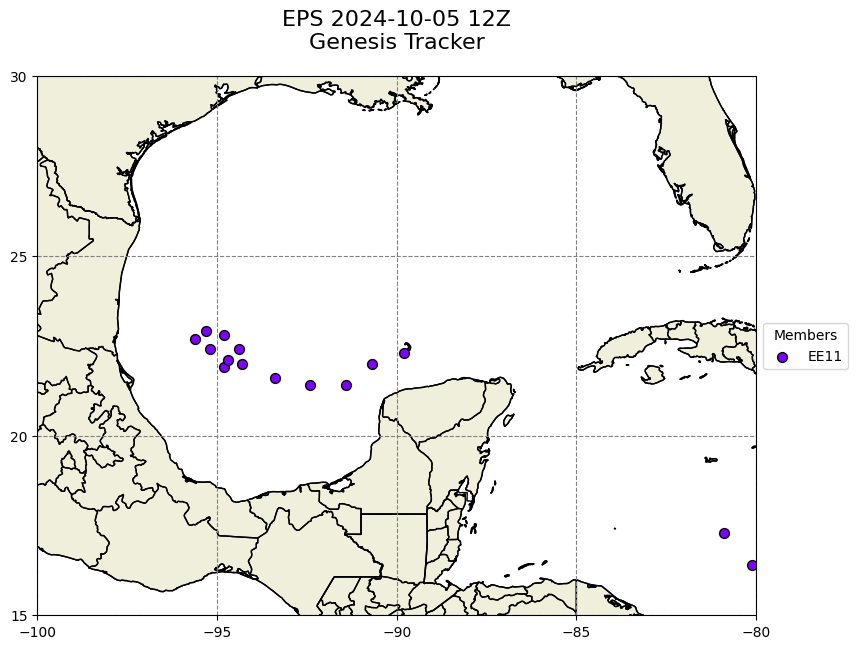

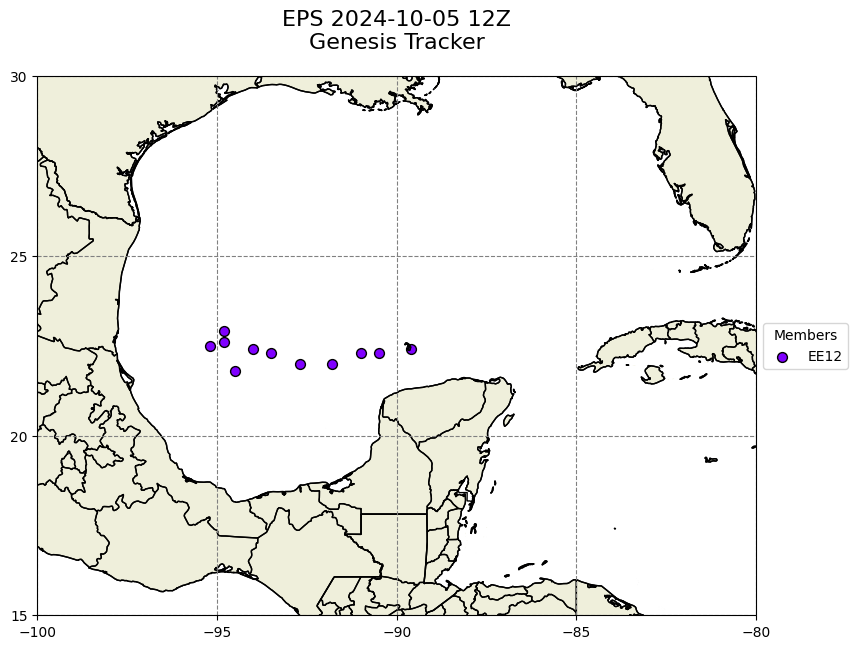

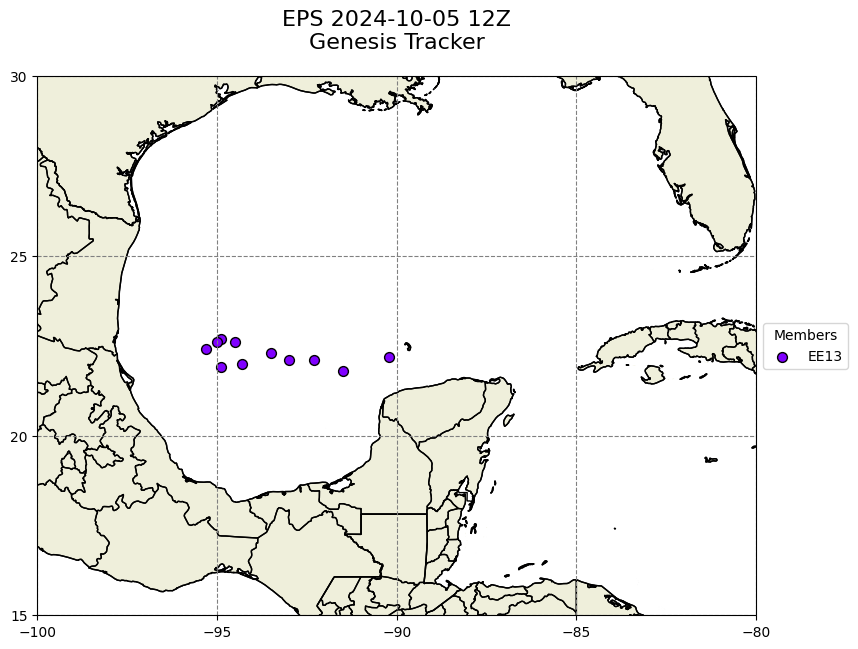

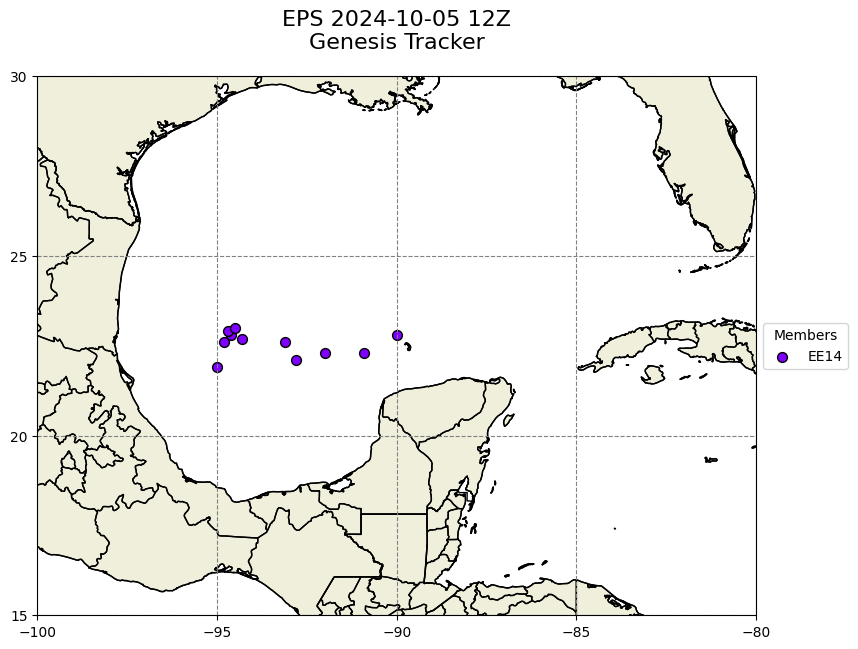

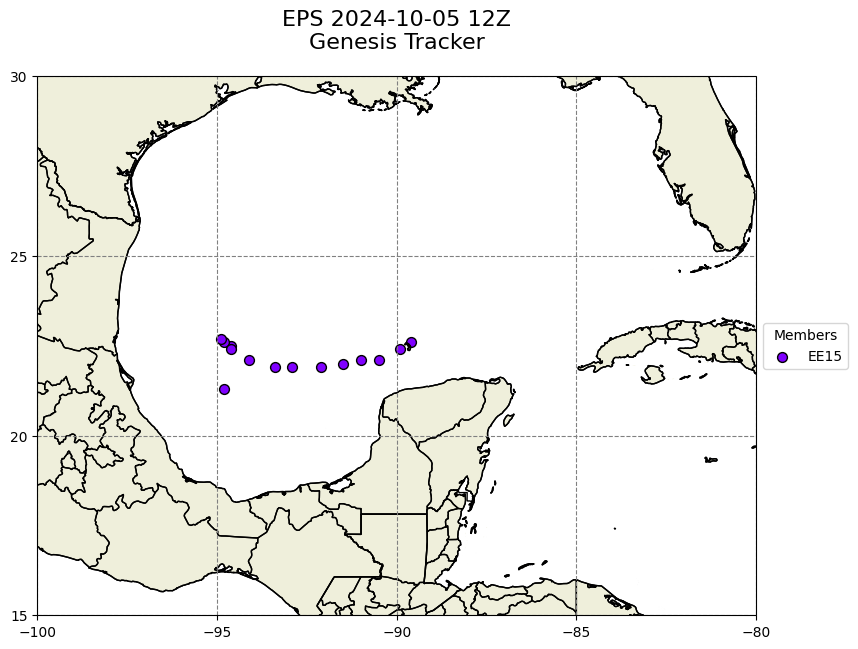

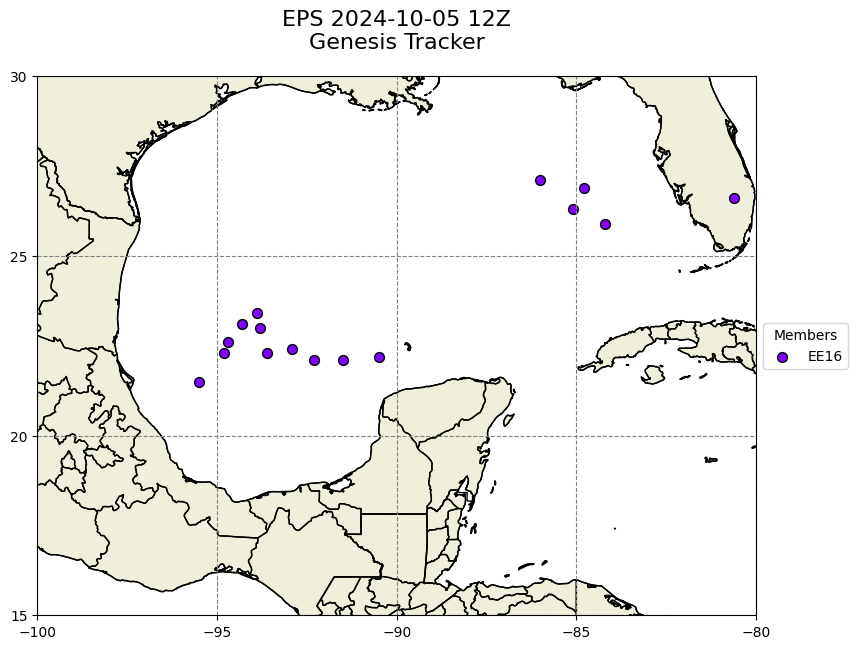

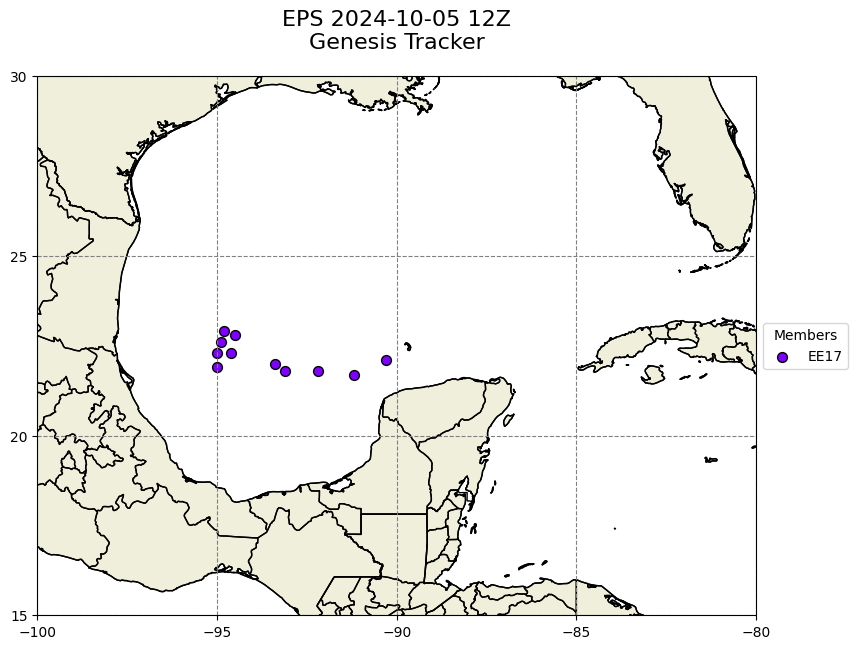

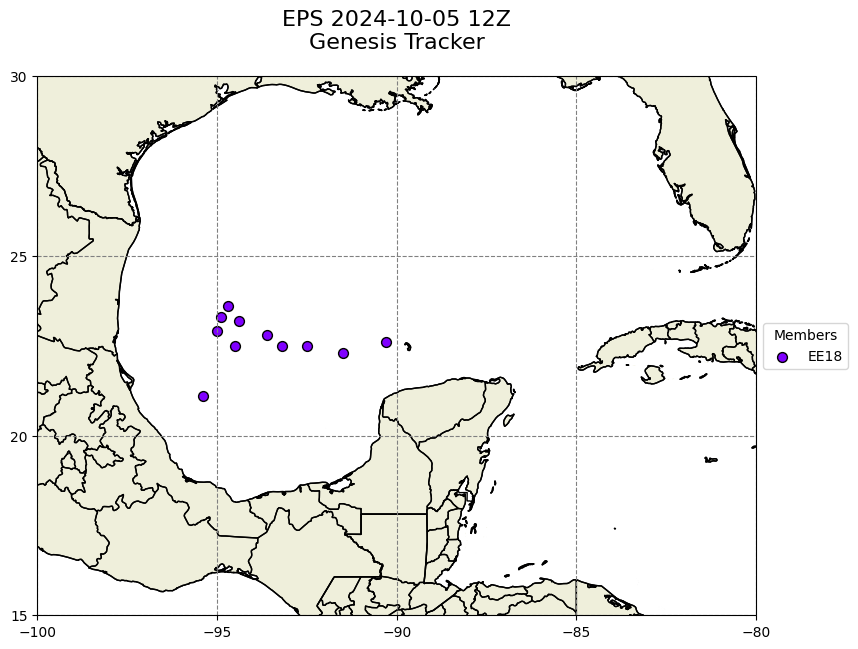

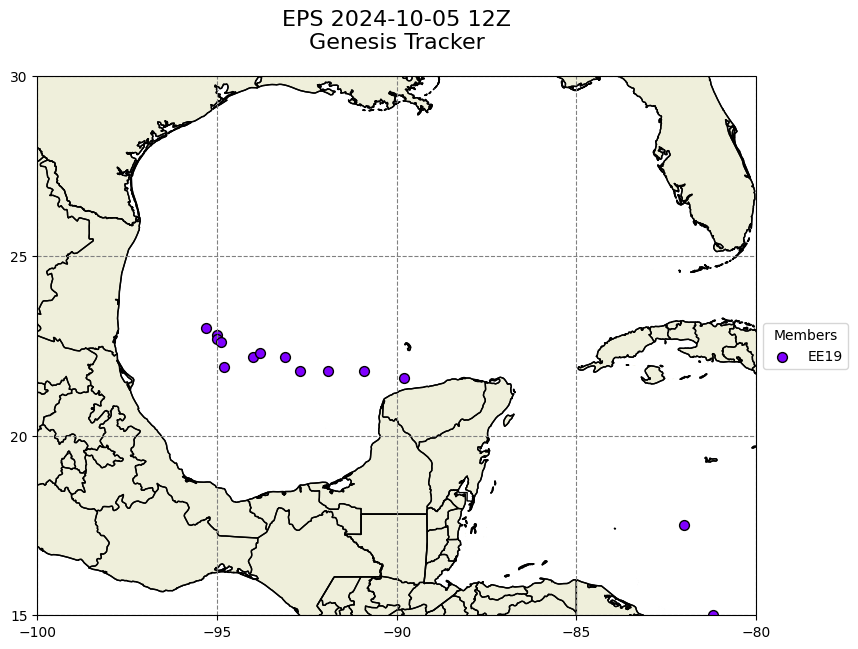

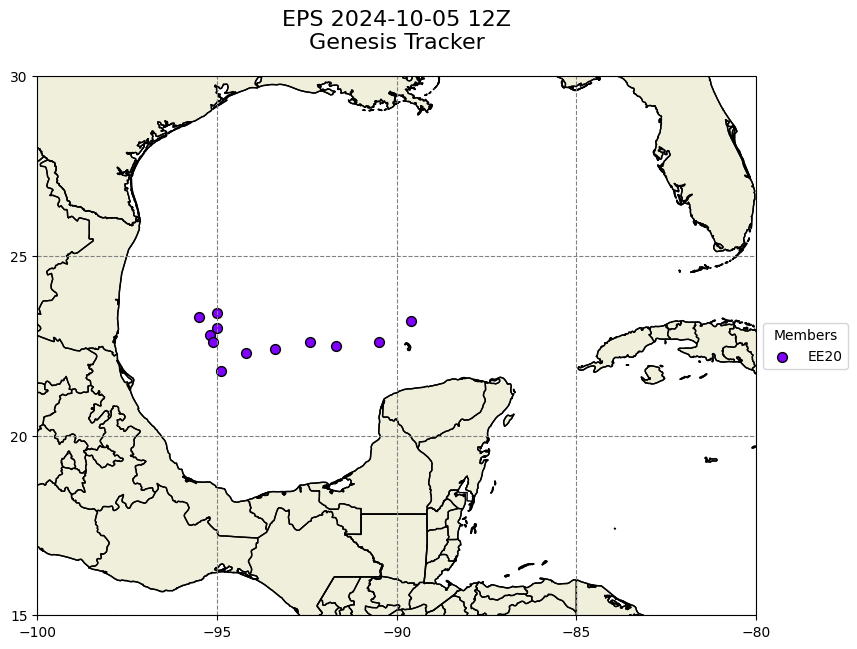

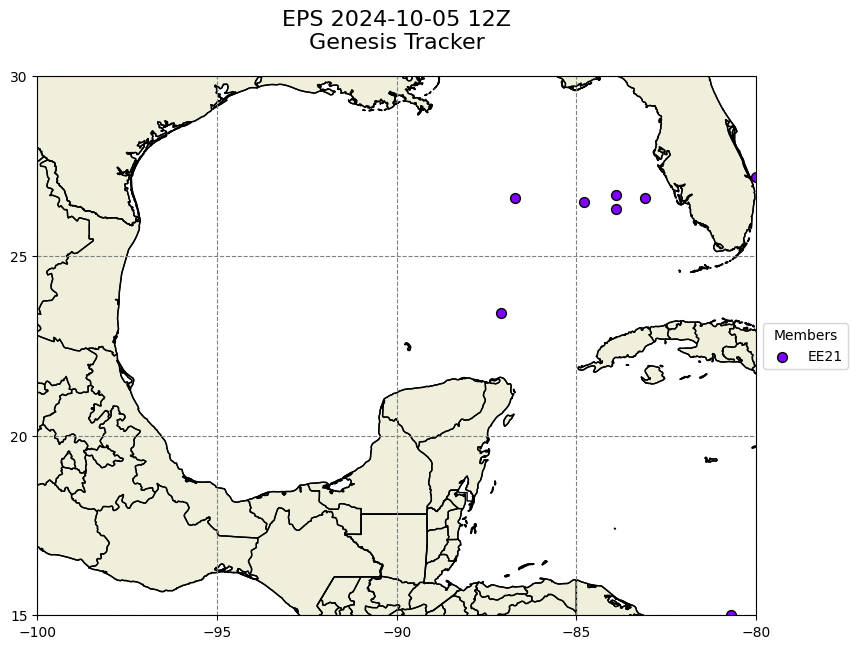

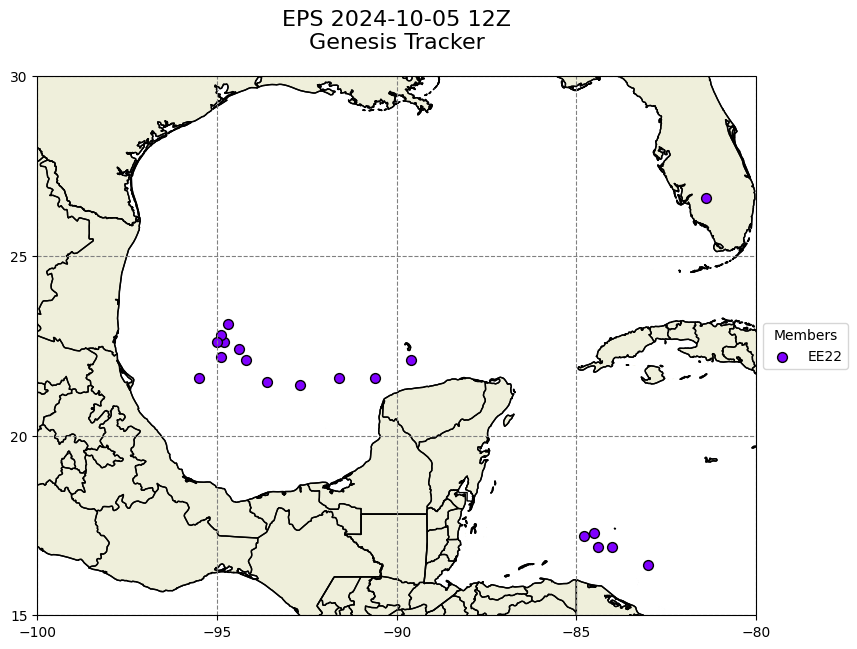

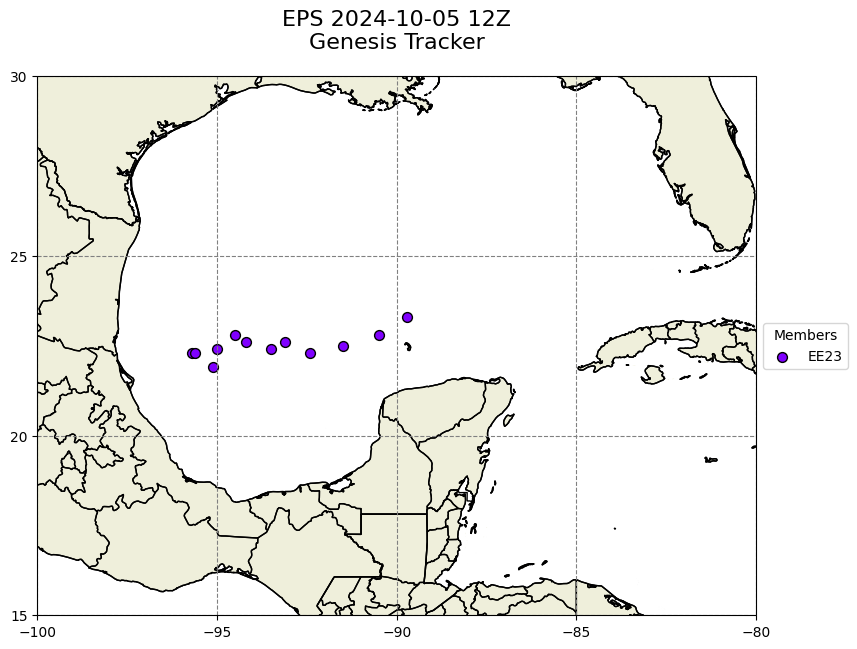

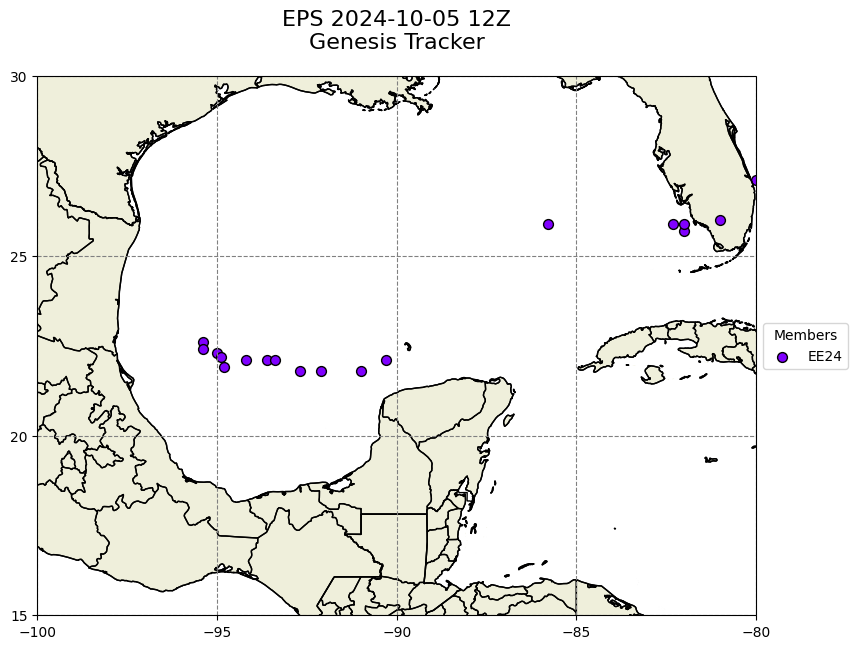

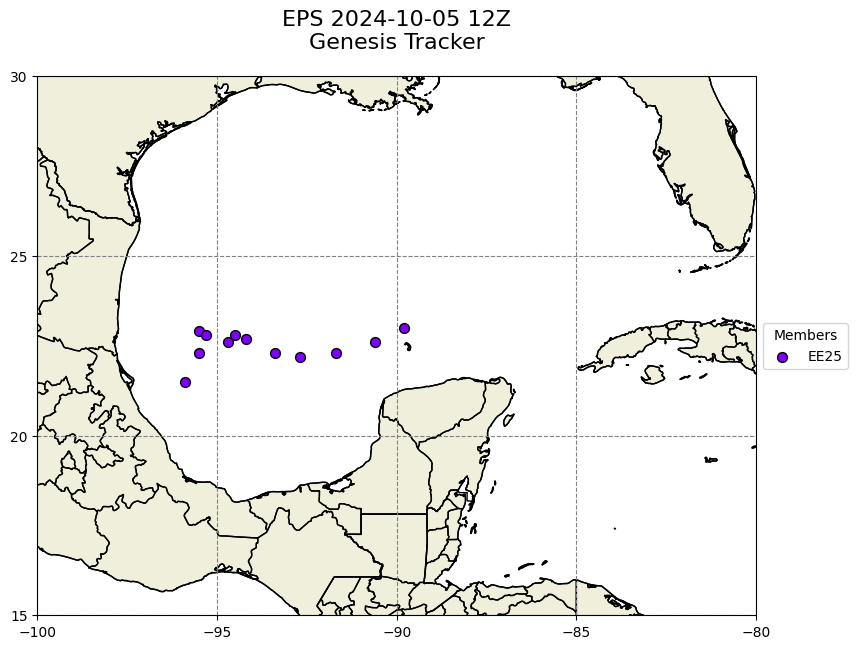

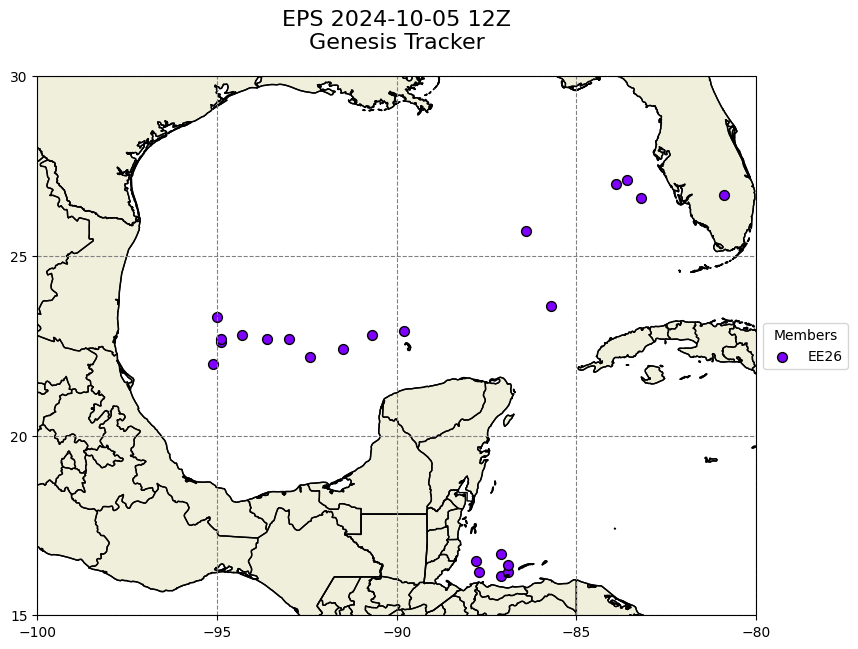

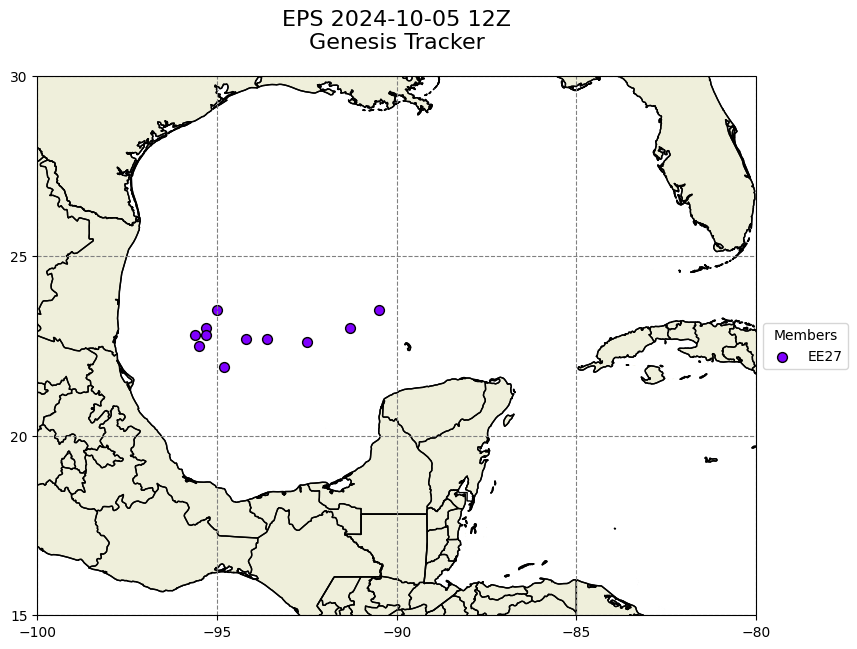

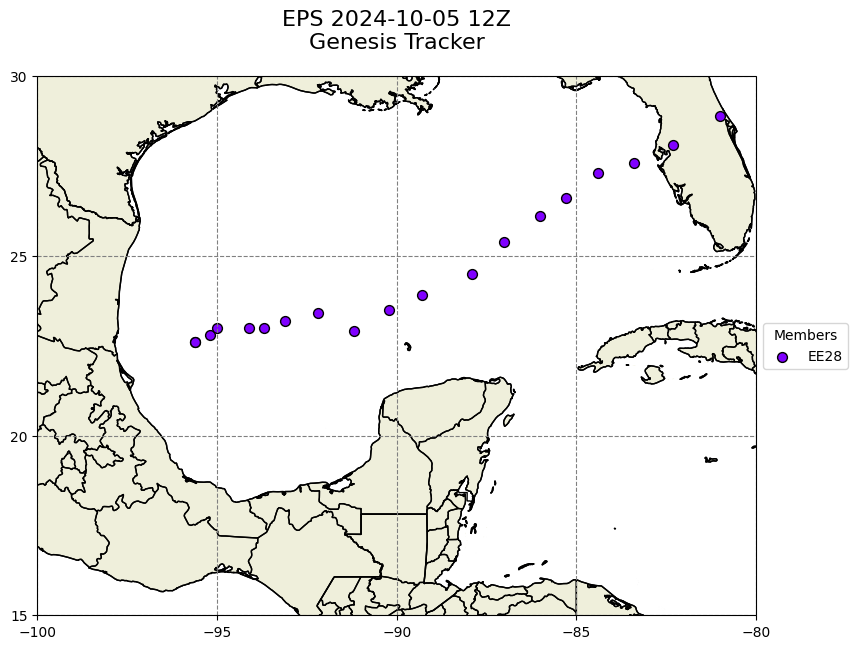

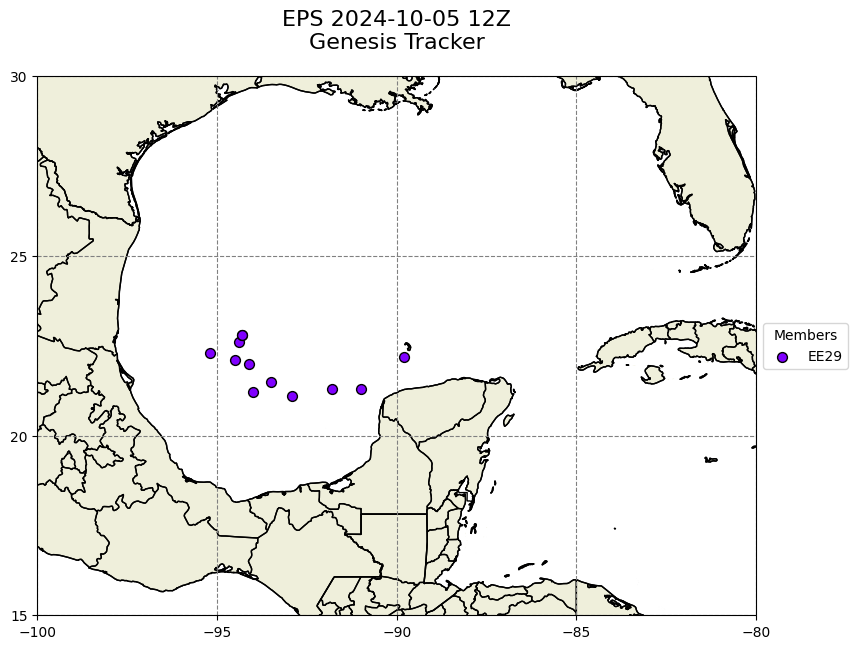

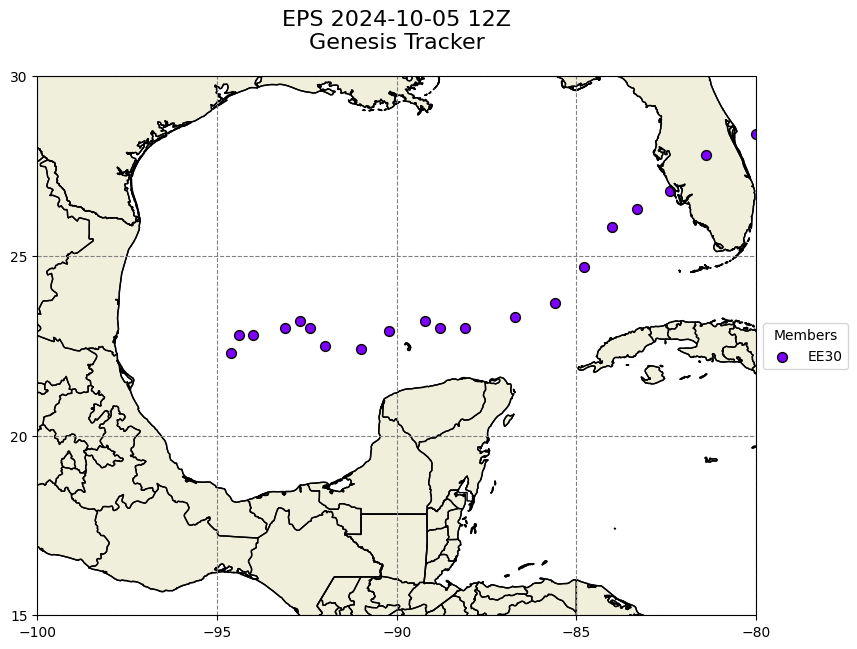

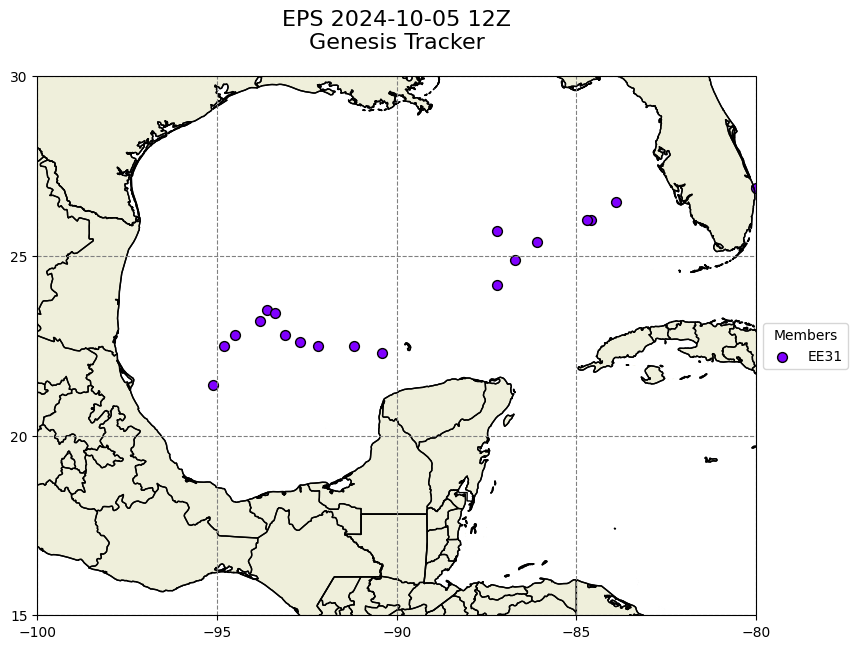

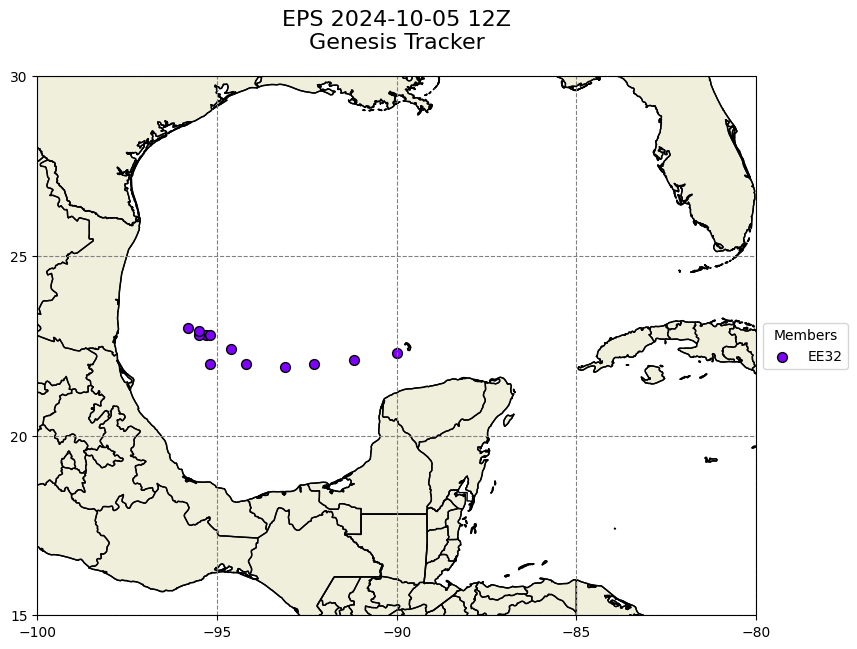

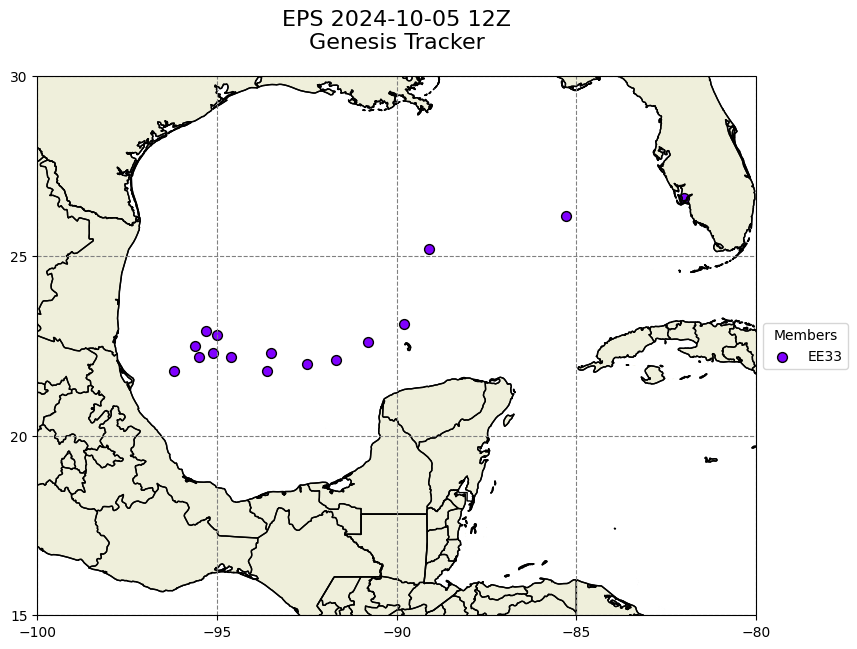

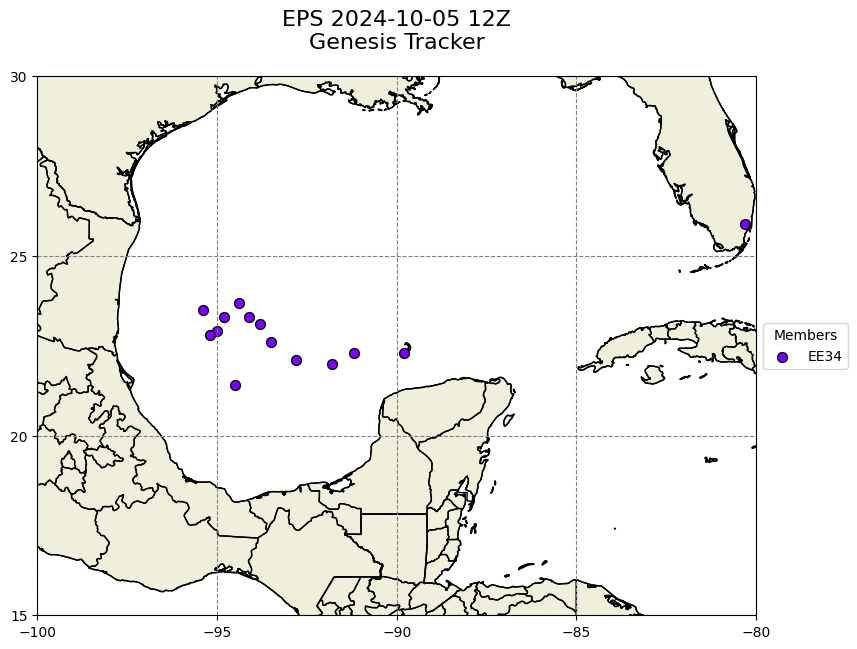

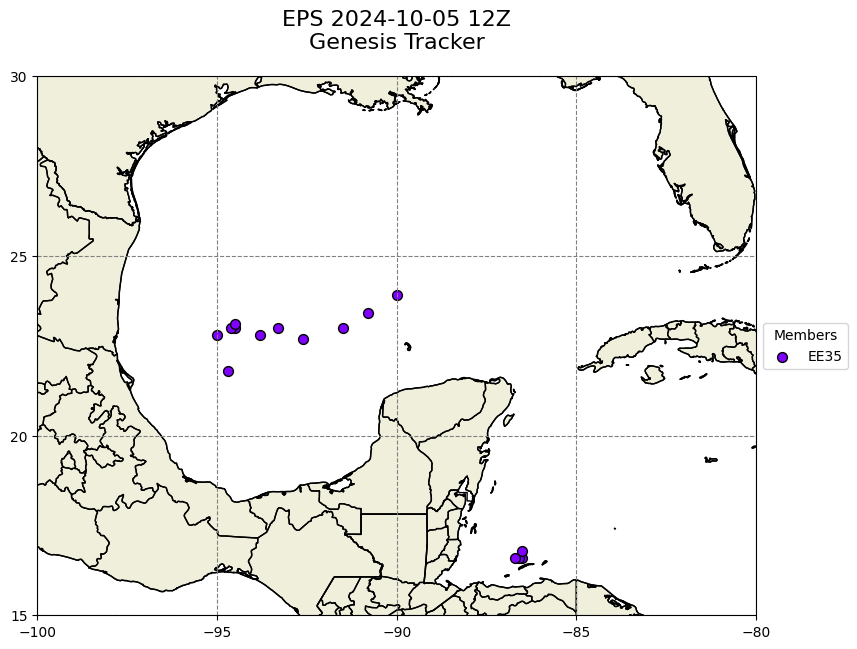

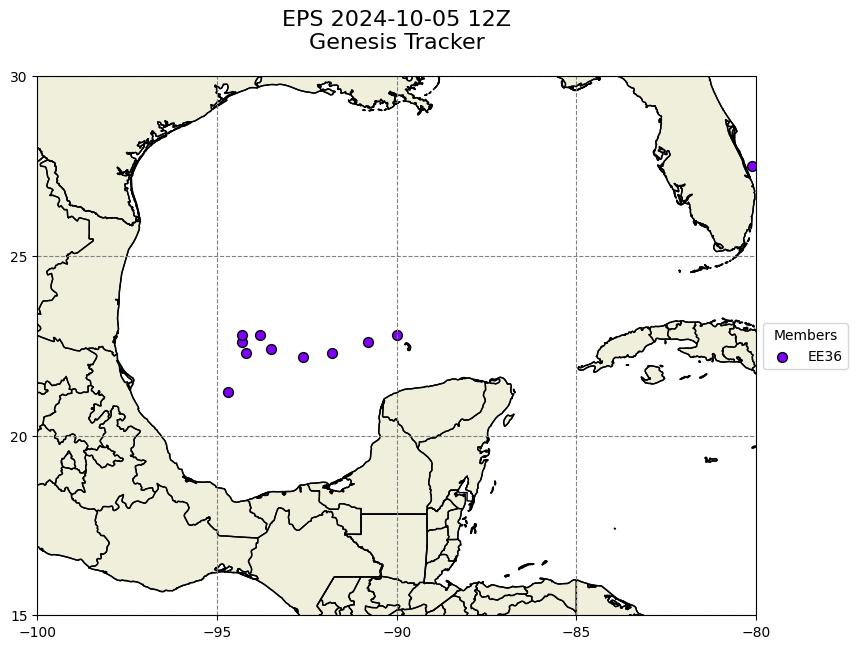

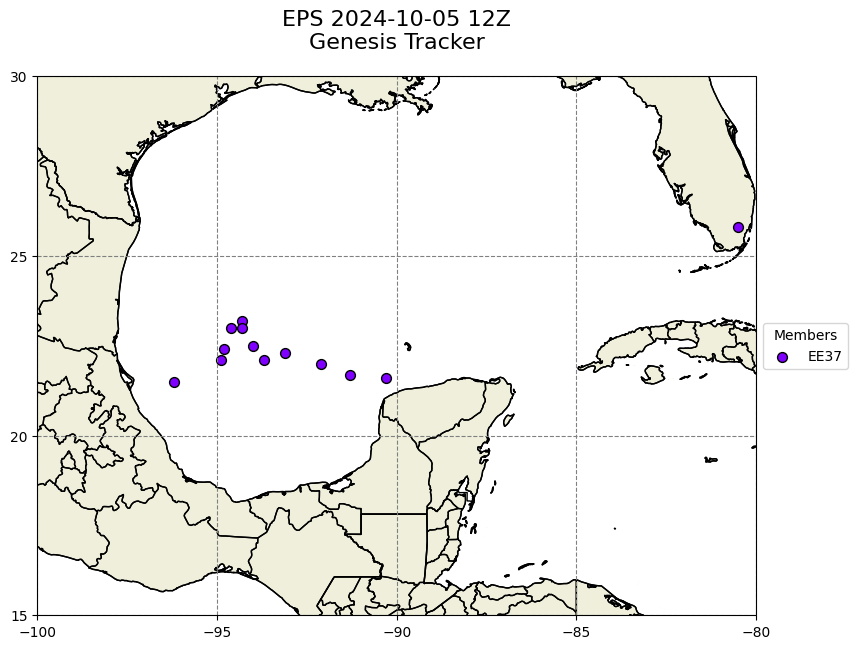

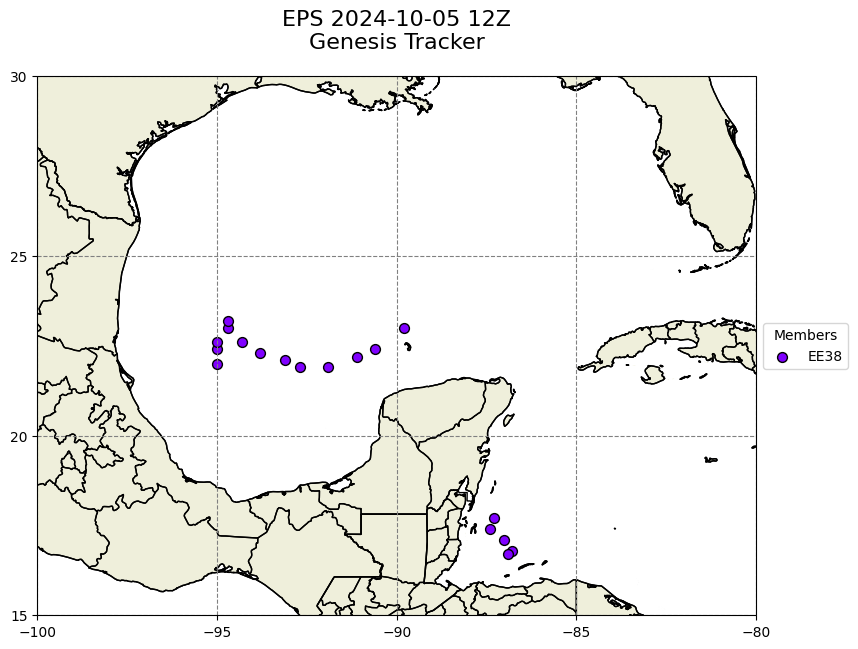

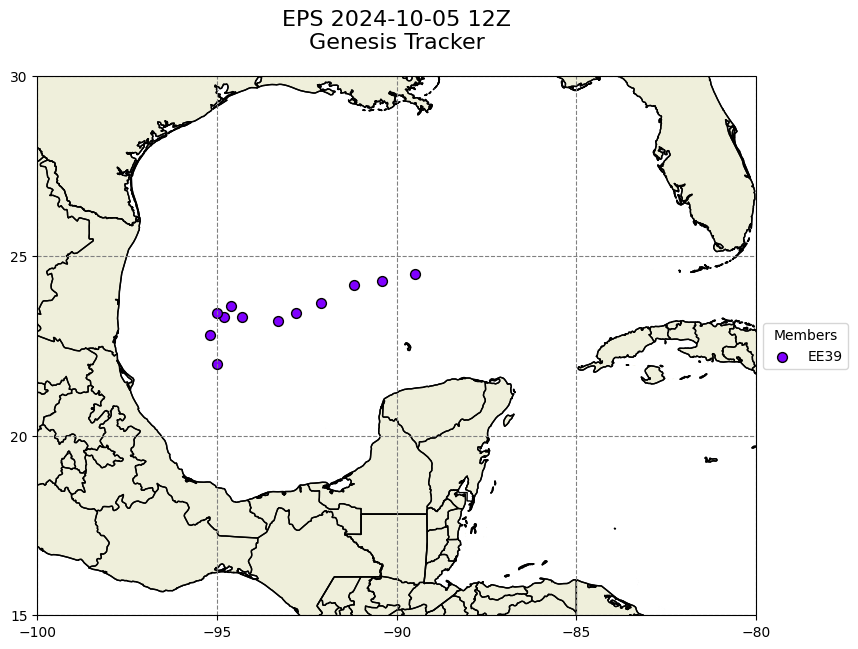

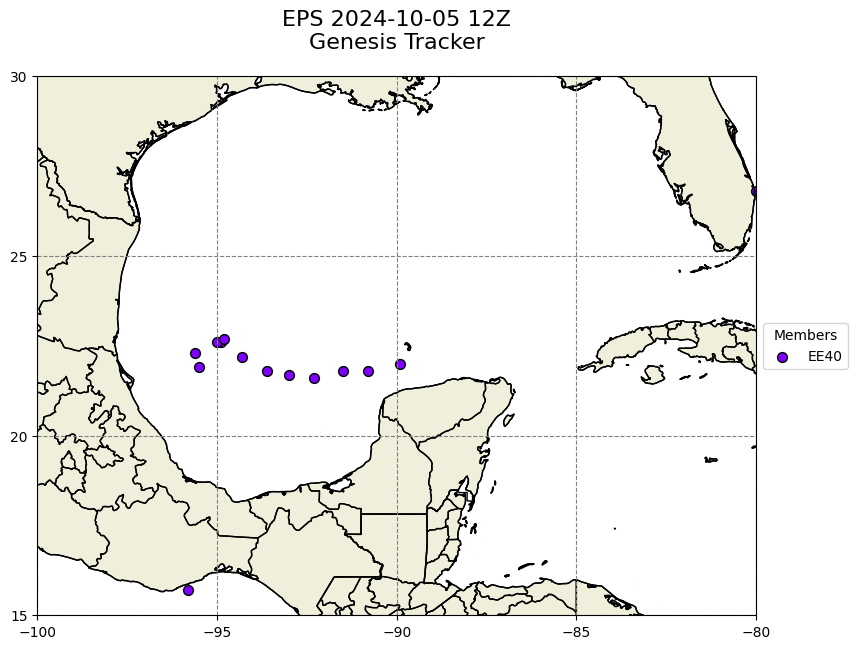

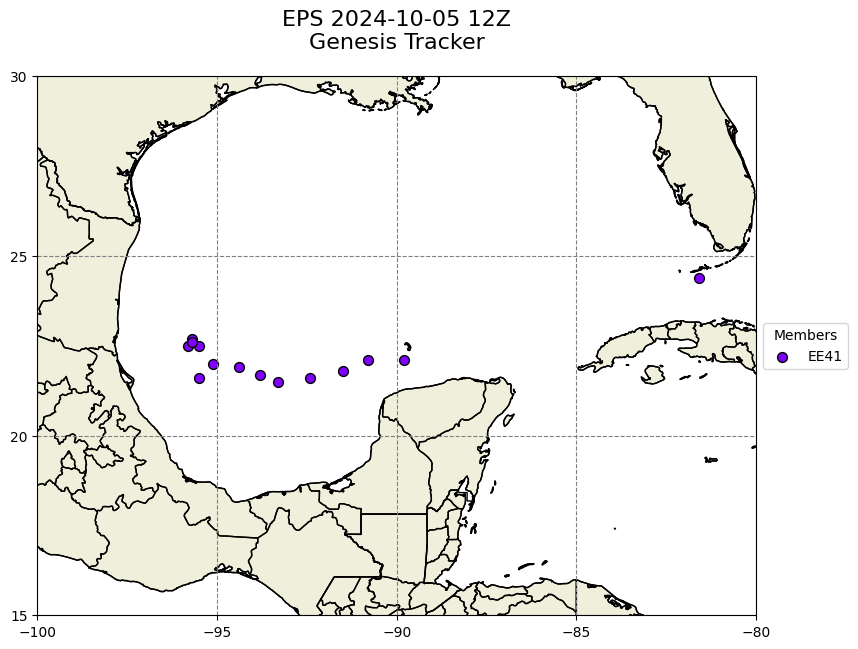

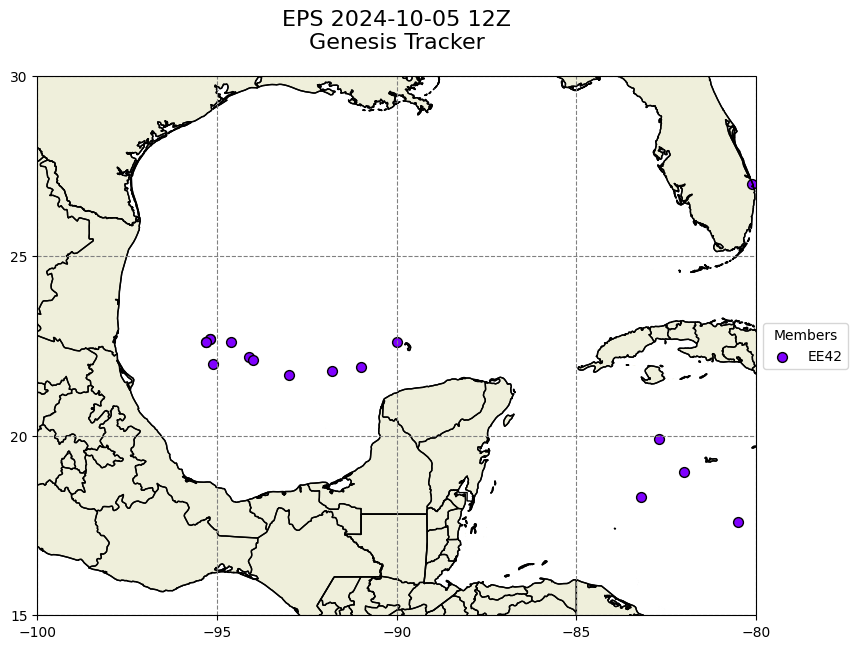

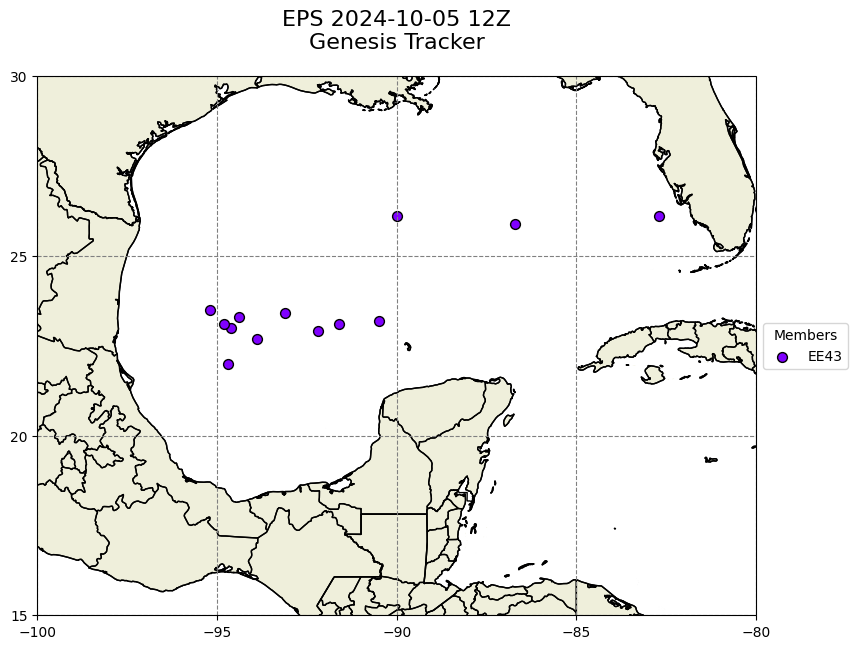

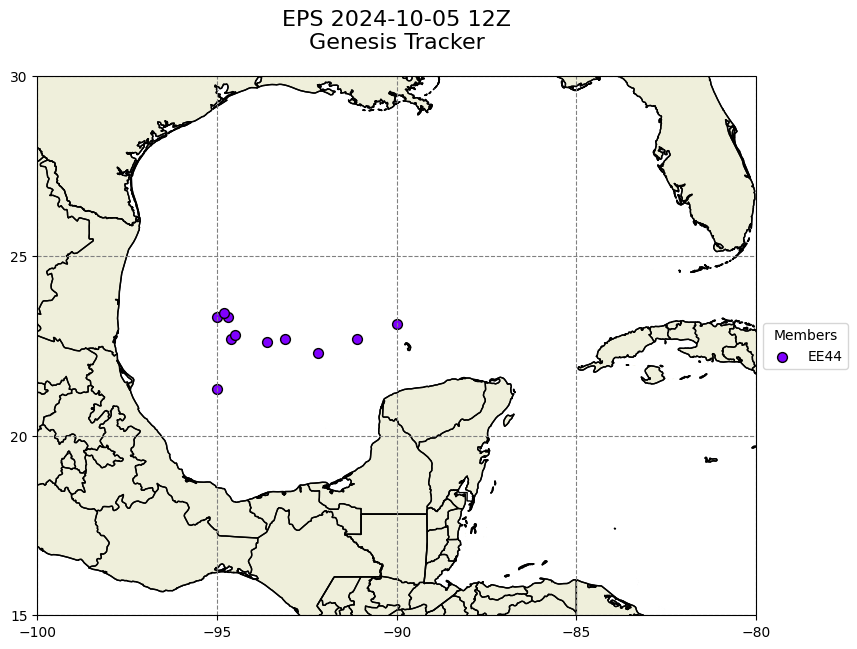

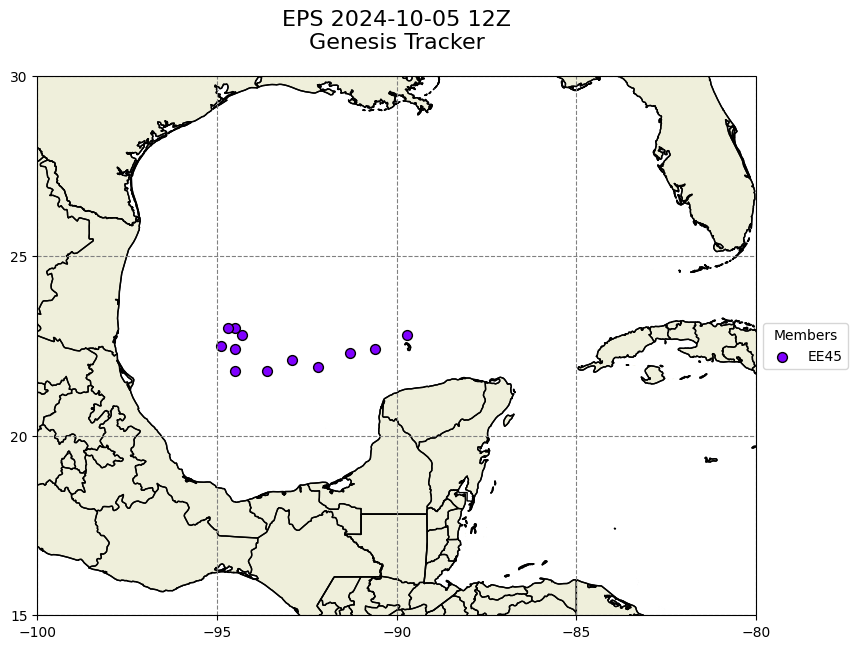

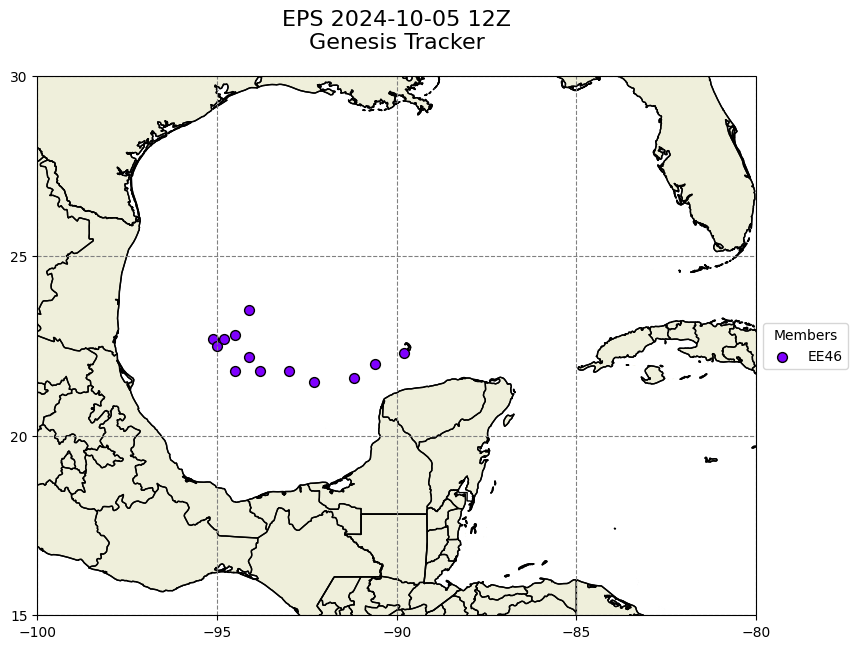

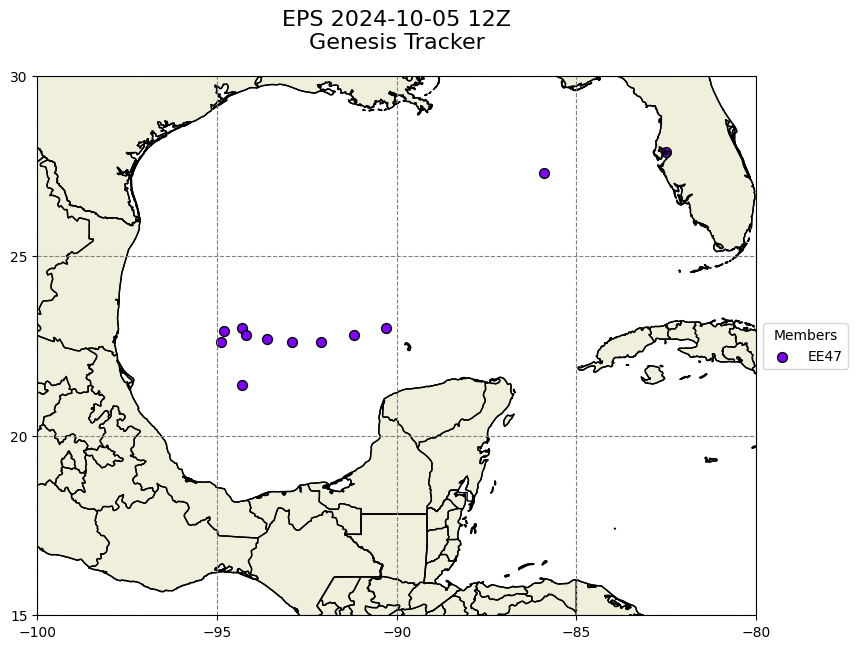

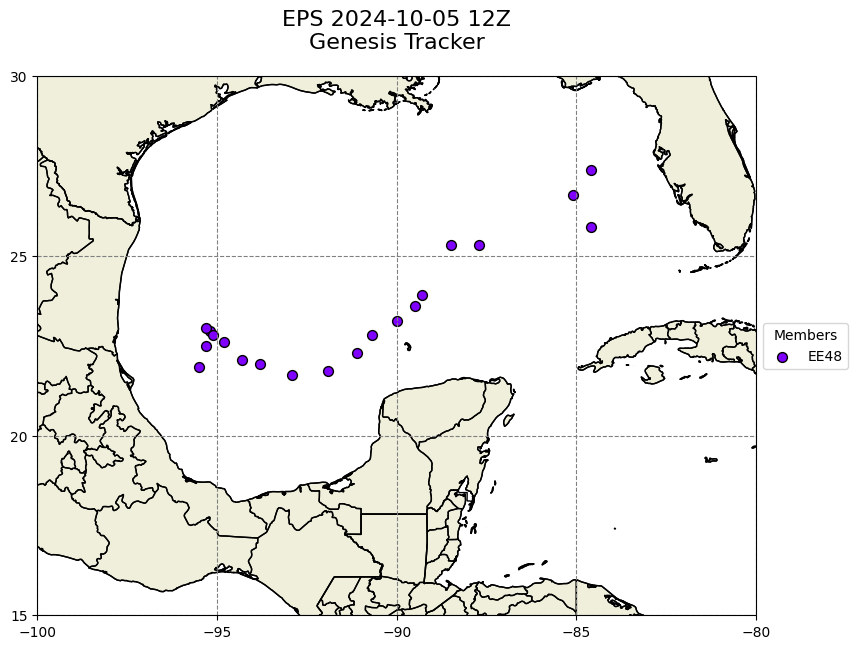

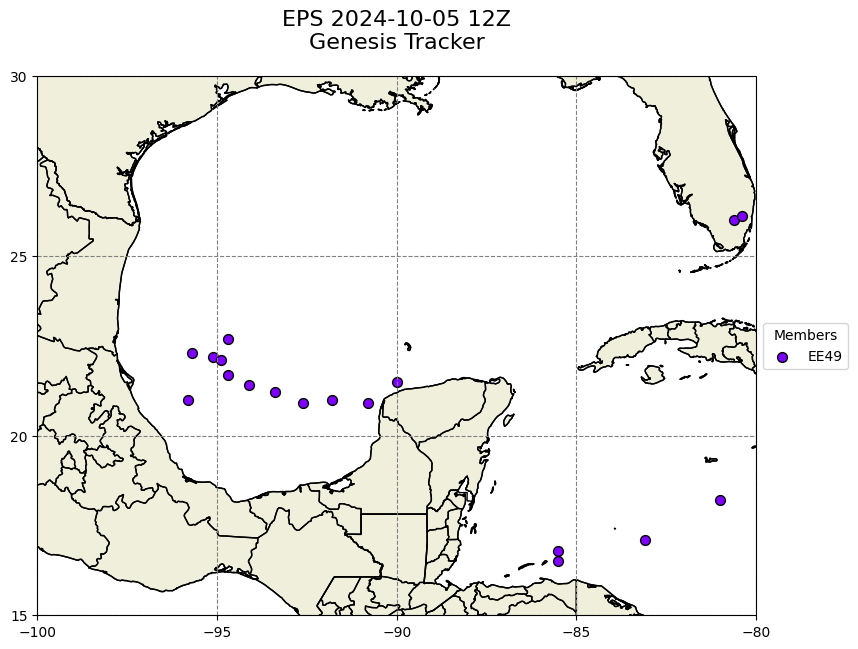

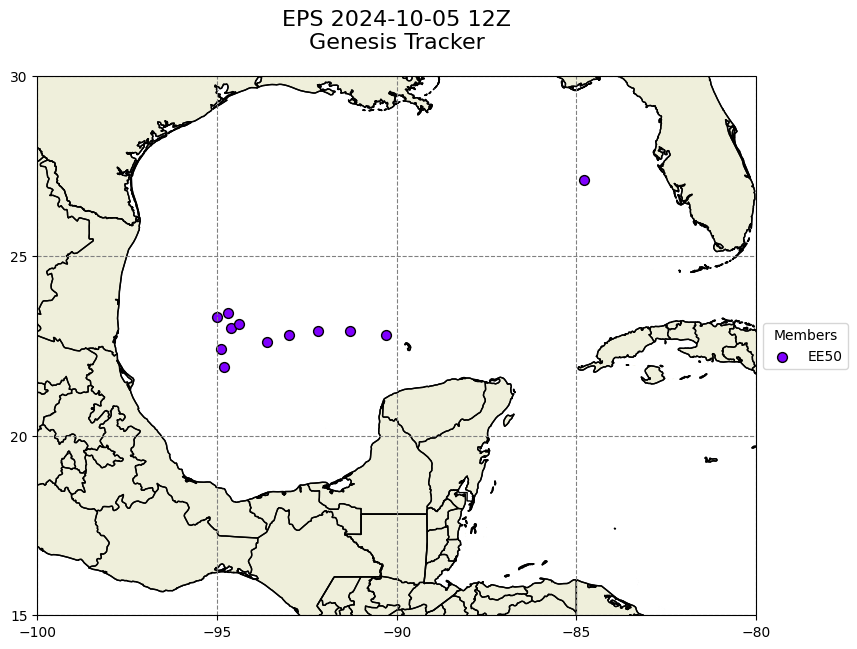

In [19]:
# Call the function to plot
eps_members = ['ECHR', 'ECME', 'EE01', 'EE02', 'EE03', 'EE04', 'EE05', 'EE06', 'EE07', 'EE08', 'EE09', 'EE10', 'EE11', 'EE12', 'EE13', 'EE14', 'EE15', 'EE16', 'EE17', 'EE18', 'EE19', 'EE20', 'EE21', 'EE22', 'EE23', 'EE24', 'EE25', 'EE26', 'EE27', 'EE28', 'EE29', 'EE30', 'EE31', 'EE32', 'EE33', 'EE34', 'EE35', 'EE36', 'EE37', 'EE38', 'EE39', 'EE40', 'EE41', 'EE42', 'EE43', 'EE44', 'EE45', 'EE46', 'EE47', 'EE48', 'EE49', 'EE50']
for eps_member in eps_members:
    plot_storms(df_valid, [eps_member])